# 1. Cargar los datos

#### Importamos librerías

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### Importamos los datos

In [2]:
# URL "raw" del archivo CSV en GitHub
csv_url = "https://raw.githubusercontent.com/josemal98/Proyecto_ML_BEDU/main/Data/heart.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_url)

# Ahora puedes trabajar con el DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Descripción de nuestras variables:

VARIABLE DEPENDIENTE

*Variable dependiente categórica binaria*

- **HeartDisease:** Enfermedad cardiaca (1: heart disease, 0: Normal). 

    
VARIABLES EXPLICATIVAS

*Variables numéricas*

- **Age:** Edad del paciente (años).

- **RestingBP:** Presión arterial en reposo (mm Hg).

- **Cholesterol:** Colesterol sérico (mm/dl). 

- **FastingBS:** Nivel de azúcar en la sangre en ayunas (1: if FastingBS > 120 mg/dl, 0: otherwise). 

- **MaxHR:** Frecuencia cardiaca máxima (valores entre 60-202). 

- **Oldpeak:** Valor numérico de depresión (ST) inducido por el ejercicio relacionado al reposo. (Representa una caída de la curva ST). 


*Variables categóricas*

- **Sex:** Género del paciente (M: Male, F: Female).

- **ChestPainType:** Tipo de dolor en el pecho (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic). 

- **RestingECG:** Actividad eléctrica del corazón (ECG o electrocardiograma) en reposo [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes’criteria].

- **ExerciseAngina:** Dolor en el pecho al ejercitarse (Y: Yes, N: No).

- **ST_Slope:** Pendiente del segmento ST en ejercicio máximo (Up: ascendente / Flat: plana / Down: descendente). 


In [ ]:
# Código para obtener un super resumen automático de los datos

# ! pip install -U ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

#### Dimensión de nuestros datos

In [3]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df.shape}\n")

Dimensión de los datos: (918, 12)



#### Tipo de dato de cada una de nuestras variables

In [5]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df.dtypes}\n")

Tipo de dato de cada variable:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



#### Cantidad de valores perdidos

In [6]:
# Valores faltantes
print(f"Valores faltantes:\n {df.isna().sum()}")

Valores faltantes:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


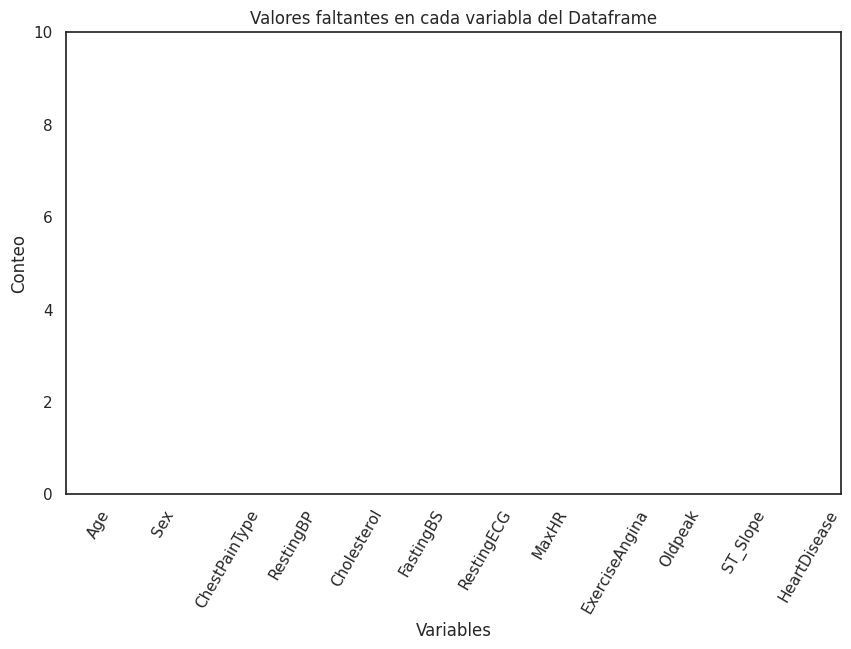

In [7]:

# Configura el estilo de Seaborn
sns.set(style="white")

# Calcula la cantidad de valores faltantes en cada variable
missing_values = df.isna().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Conteo')
plt.xticks(rotation=60)  # Rotar las etiquetas del eje x para que sean legibles
plt.title('Valores faltantes en cada variabla del Dataframe')

# Establece los límites del eje y de 0 a 10
plt.ylim(0, 10)

plt.show()


#### Analizamos el balance de las categorías de nuestra variable objetivo.

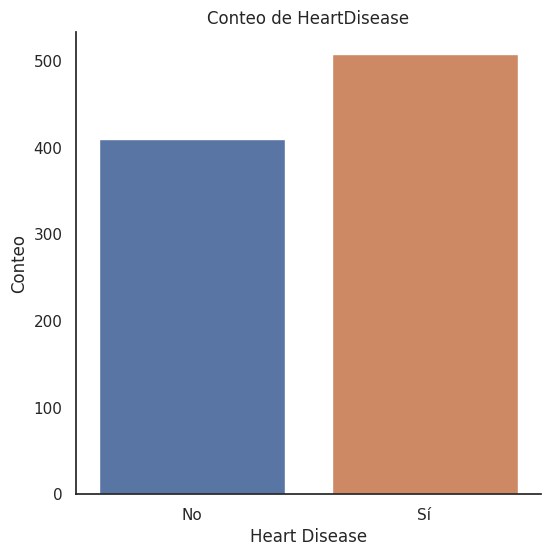

In [25]:
# Configura el estilo de Seaborn
sns.set(style="white")

# Crea la figura para la gráfica de barras de 'HeartDisease' sin bordes
plt.figure(figsize=(6, 6))

# Grafica la gráfica de barras de 'HeartDisease'
sns.countplot(data=df, x="HeartDisease")
plt.xlabel('Heart Disease')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['No', 'Sí'])
plt.title('Conteo de HeartDisease')

# Elimina los bordes del eje
sns.despine()

# Mostrar la figura
plt.show()


#### Analizamos nuestras variables categóricas con respecto a la variable objetivo.

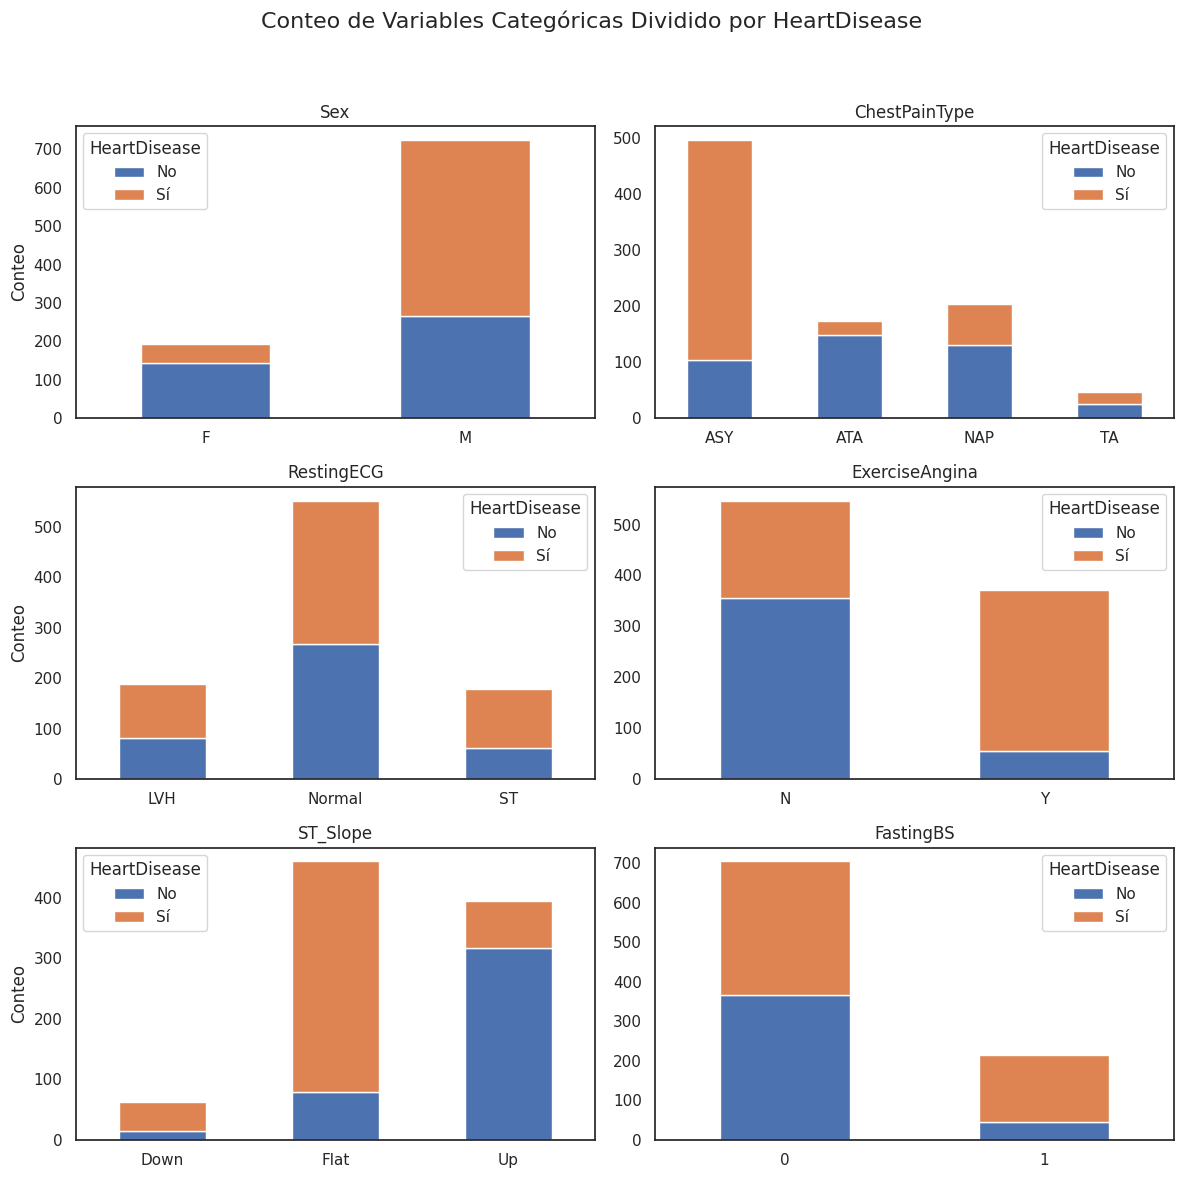

In [26]:
# Configura el estilo de Seaborn en "darkgrid"
sns.set_style("white")

# Definir las columnas categóricas
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Configurar la figura y los subplots
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajustar el espacio entre subplots
axes = axes.reshape(-1)

# Iterar a través de las columnas categóricas y crear gráficas de barras apiladas por la variable objetivo
for i, column in enumerate(categorical_columns):
    # Dividir los datos por HeartDisease y contar las frecuencias para cada categoría
    grouped = df.groupby([column, 'HeartDisease']).size().unstack()

    # Crear un gráfico de barras apiladas
    ax = grouped.plot(kind='bar', stacked=True, ax=axes[i])
    ax.set_xlabel('')
    if i % 2 == 0:
        ax.set_ylabel('Conteo')
    else:
        ax.set_ylabel('')
    ax.set_title(column)

    # Desactivar la rotación de los x-labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Personalizar la leyenda
    ax.legend(title='HeartDisease', labels=['No', 'Sí'])

# Eliminar los subplots vacíos si hay menos de 6 variables categóricas
if len(categorical_columns) < num_rows * num_cols:
    for i in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Agregar un título general a la figura
plt.suptitle('Conteo de Variables Categóricas Dividido por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()


#### Estadísticos básicos de nuestras variables numericas.


In [27]:
# Lista de columnas numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Estadísticos de las variables numericas
df[numerical_columns].describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


#### Analizamos nuestras variables numéricas con respecto a la variable objetivo.

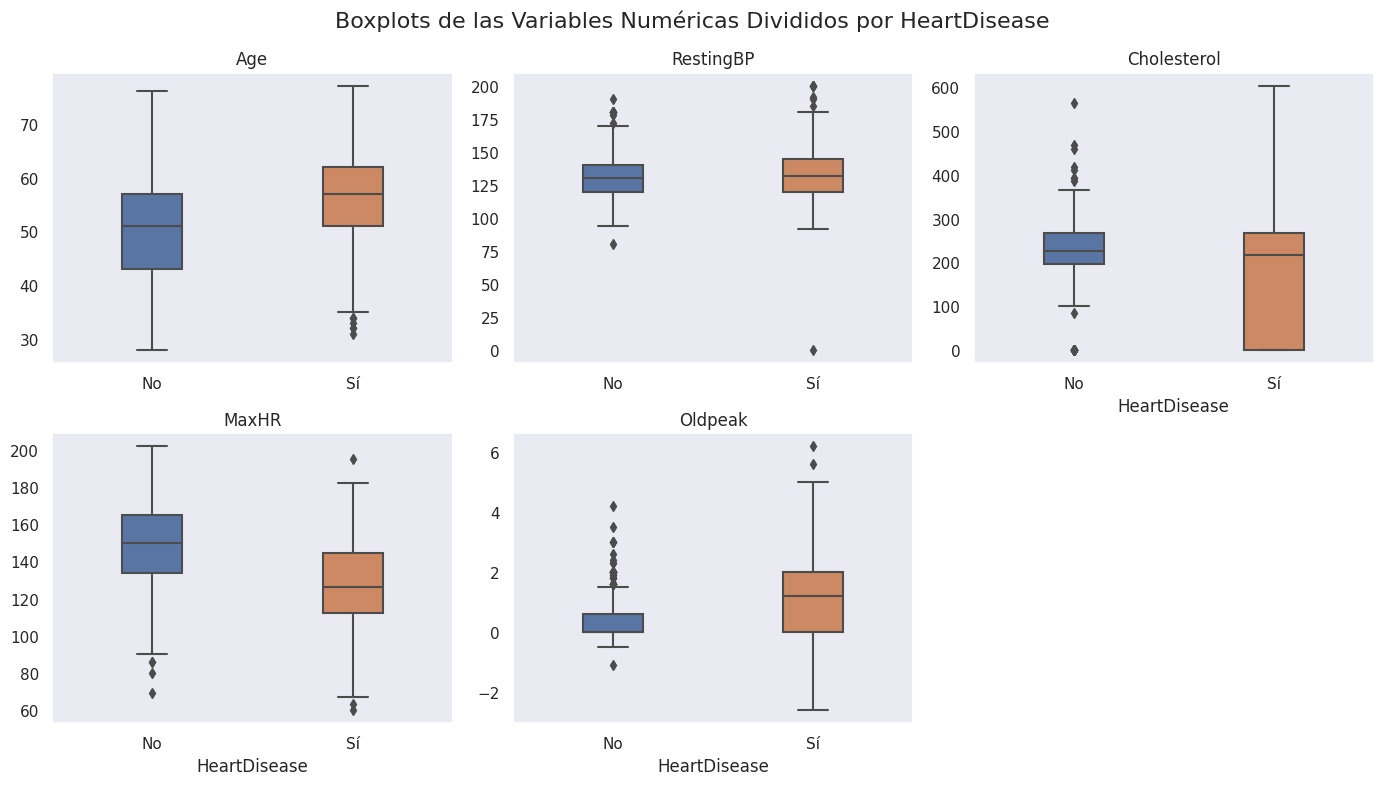

In [18]:
sns.set_style("dark")

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear boxplots divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='HeartDisease', y=column, ax=axes[i], width=0.3)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(['No', 'Sí'])  # Cambiar las etiquetas del eje x

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas Divididos por HeartDisease', fontsize=16)

axes[2].set_xlabel('HeartDisease')
axes[3].set_xlabel('HeartDisease')
axes[4].set_xlabel('HeartDisease')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


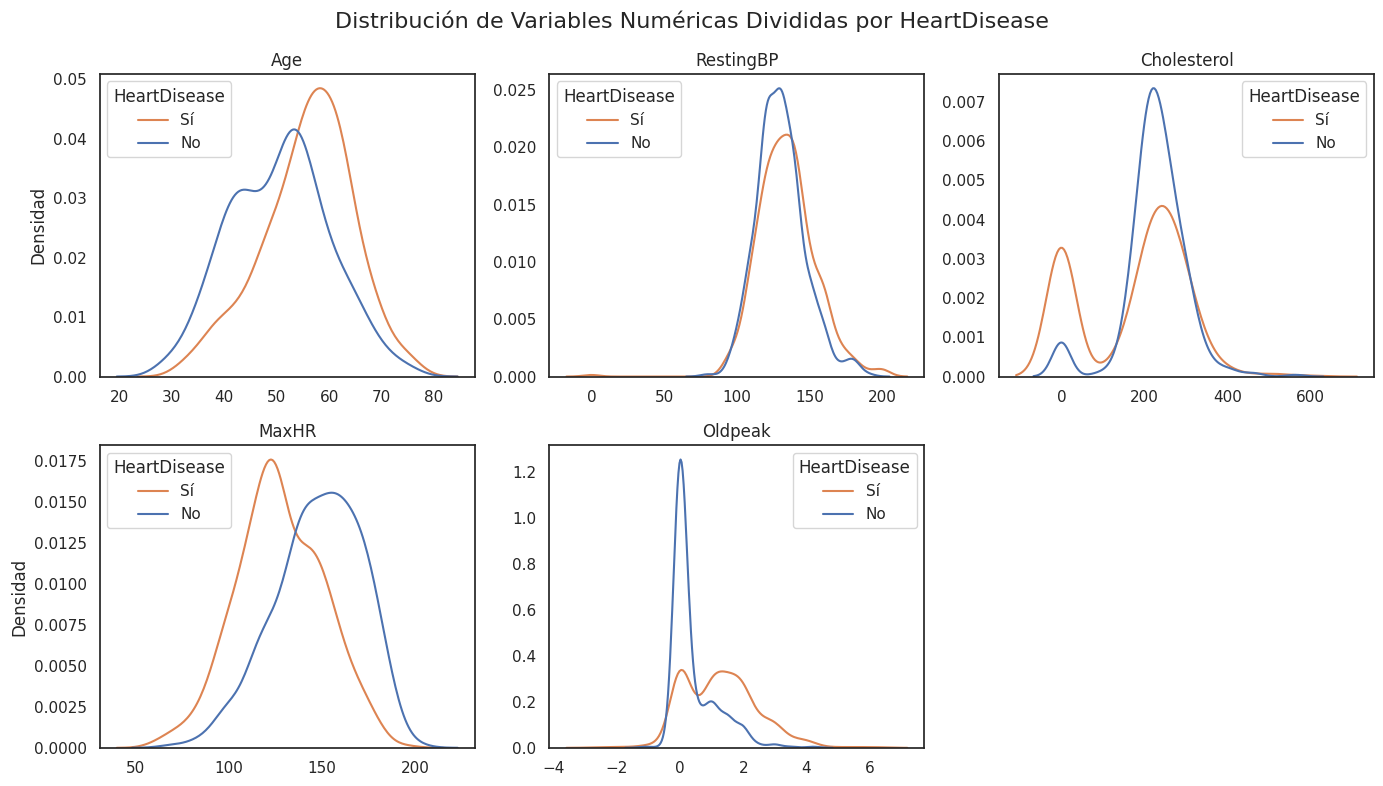

In [29]:
# Configura el estilo de Seaborn en "darkgrid"
sns.set_style("white")

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear gráficos de densidad (KDE) divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, hue='HeartDisease', ax=axes[i], common_norm=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densidad')

    # Personalizar la leyenda
    axes[i].legend(title='HeartDisease', labels=['Sí', 'No'])

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Eliminamos los ylabels
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[4].set_ylabel('')

# Agregar un título general a la figura
fig.suptitle('Distribución de Variables Numéricas Divididas por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Correlación entre todas las variables de nuestro Dataframe.

<ipython-input-30-19376b3fdcaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


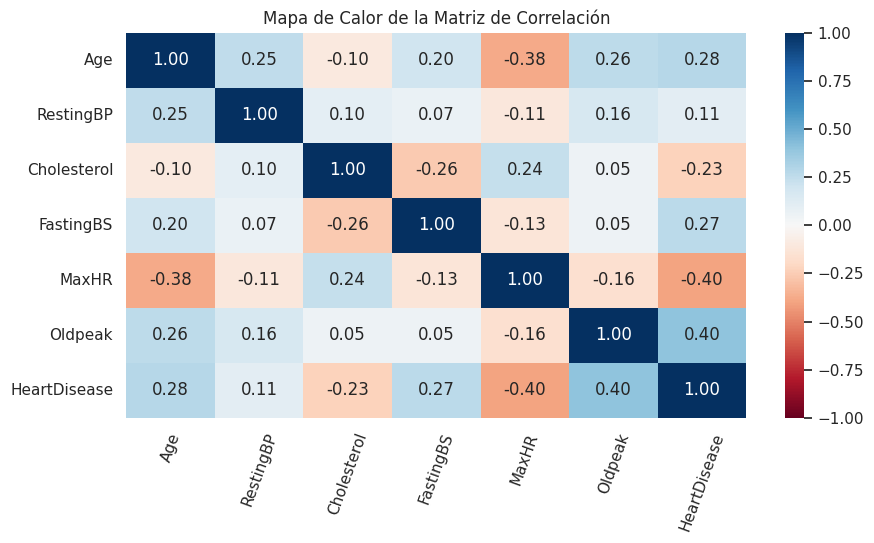

In [30]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el estilo del mapa de calor
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70)
plt.show()

# 3. Preparación de los datos

#### Algo que notamos en el análisis exploratorio es que la variable Cholesterol tiene muchos valores 0, probablemente añadidos para reemplazar a los datos faltantes.

In [54]:
print(f"Valores 0 en la variable Cholesterol: {sum(df.Cholesterol == 0)}")

Valores 0 en la variable Cholesterol: 172


Además, notamos que las distribuciones de Cholesterol están bastante solapadas y por ende no es informativa con respecto a la variable objetivo. Con base en esto, decidimos eliminar esta columna.

In [55]:
# Eliminamos la columna Cholesterol
df_drop = df.drop('Cholesterol', axis=1)

#### Eliminación de outliers empleando el criterio de 1.5 veces el rango intercuartílico

In [66]:
# Creamos una copia de df_transformed
df_clean = df_drop.copy()

# Lista de columnas numéricas sin Cholesterol
numerical_columns = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

# Itera sobre las columnas numéricas y elimina los outliers
for column in numerical_columns:
    Q1 = df_drop[column].quantile(0.25)
    Q3 = df_drop[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtra los valores que no son outliers
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# Calculamos la cantidad de outliers eliminados
print(f"Cantidad de outliers detectados: {len(df_drop) - len(df_clean)}")

Cantidad de outliers detectados: 44


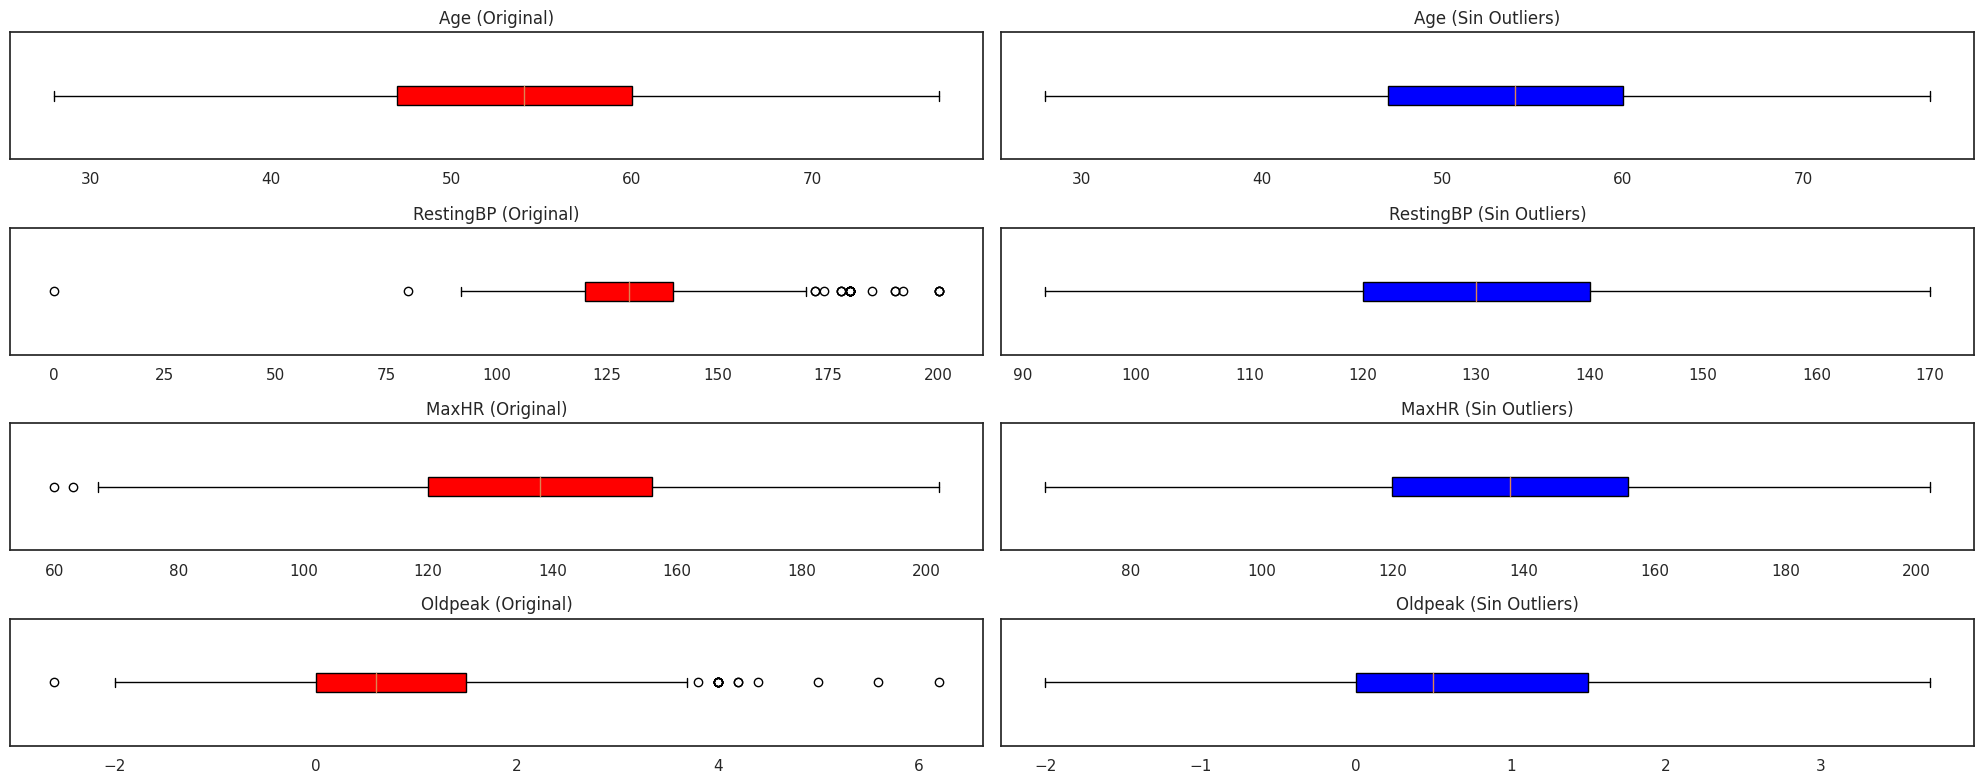

In [67]:

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 8))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, column in enumerate(numerical_columns):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{column} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean[column], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{column} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Conversión de variables categóricas a numéricas con *OneHotEncoding*.

In [58]:
# Definir las columnas categóricas sin incluir FastingBS
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Utiliza get_dummies para convertir las columnas categóricas en variables numéricas
df_trans = pd.get_dummies(df_clean, columns=categorical_columns)

# Inspeccionamos el nuevo dataframe
df_trans

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


#### Estandarización de variables numéricas.

In [49]:
# Lista con los índices de las columnas categóricas y numéricas
#categorical_index = [0, 1, 2, 5, 7, 9]
#numerical_index = [3, 6, 8]
#
## Transformación de los datos
#ct = ColumnTransformer([
#    ('catagoric', OneHotEncoder(), categorical_index),
#    ('numeric', StandardScaler(), numerical_index)
#    ], remainder='passthrough')  # Las columnas no provistas (FastingBS y HeartDisease) se dejan como tal
#data_trans = ct.fit_transform(df_trans.values)
#
## Muestra de nuestros datos transformados (arreglo de numpy)
#print('Cleaned Data:')
#print(data_trans[0])

In [59]:
# Lista con los índices de las columnas categóricas y numéricas
numerical_index = [0, 1, 2, 3, 4, 5, 6, 7]

# Transformación de los datos
ct = ColumnTransformer([
    ('numeric', StandardScaler(), numerical_index)]
    , remainder='passthrough')  # Las columnas no provistas se dejan intactas
data_std = ct.fit_transform(df_trans.values)

# Convertimos el Numpy array resultante en un DataFrame
df_std = pd.DataFrame(data_std, columns=df_trans.columns.tolist())

# Muestra de nuestros datos transformados (arreglo de numpy)
print('Datos estandarizados:\n')
df_std

Datos estandarizados:



,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.404997,0.567638,-0.550030,1.385339,-0.859834,-1.088577,-0.512841,0.512841,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.457491,1.831948,-0.550030,0.749025,0.173575,0.918630,1.949923,-1.949923,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.720832,-0.064517,-0.550030,-1.557613,-0.859834,-1.088577,-0.512841,0.512841,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.562770,0.441207,-0.550030,-1.159917,0.690279,0.918630,1.949923,-1.949923,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.068901,1.199793,-0.550030,-0.603142,-0.859834,-1.088577,-0.512841,0.512841,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,-0.878605,-1.328828,-0.550030,-0.205446,0.380257,0.918630,-0.512841,0.512841,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
870,1.542798,0.820500,1.818081,0.152481,2.653756,0.918630,-0.512841,0.512841,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
871,0.384736,-0.064517,-0.550030,-0.881530,0.380257,0.918630,-0.512841,0.512841,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
872,0.384736,-0.064517,-0.550030,1.464878,-0.859834,0.918630,1.949923,-1.949923,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# 4. Selección del modelo

# 5. Entrenamiento del modelo

# 6. Evaluación del modelo